# Down Jones Index Predicition Using ARIMA Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
%config Completer.use_jedi = False
plt.style.use('fivethirtyeight')

In [6]:
dji_df = pd.read_csv('DJI.csv')
dji_df = dji_df.set_index(pd.DatetimeIndex(dji_df['Date']))
dji_df = dji_df.sort_index()
dji_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-21,2020-01-21,29269.050781,29341.210938,29146.470703,29196.039063,29196.039063,320640000
2020-01-22,2020-01-22,29263.630859,29320.199219,29172.259766,29186.269531,29186.269531,283440000
2020-01-23,2020-01-23,29111.019531,29190.470703,28966.980469,29160.089844,29160.089844,307060000
2020-01-24,2020-01-24,29230.390625,29288.789063,28843.310547,28989.730469,28989.730469,380010000
2020-01-27,2020-01-27,28542.490234,28671.789063,28440.470703,28535.800781,28535.800781,337270000
2020-01-28,2020-01-28,28594.279297,28823.230469,28575.750000,28722.849609,28722.849609,330140000
2020-01-29,2020-01-29,28820.529297,28944.240234,28728.189453,28734.449219,28734.449219,302290000
2020-01-30,2020-01-30,28640.160156,28879.710938,28489.759766,28859.439453,28859.439453,326850000
2020-01-31,2020-01-31,28813.039063,28813.039063,28169.529297,28256.029297,28256.029297,403890000


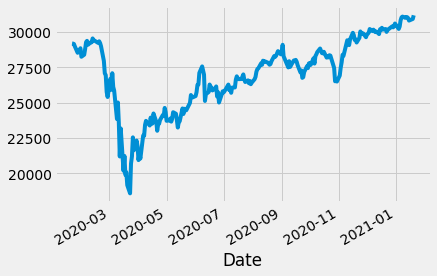

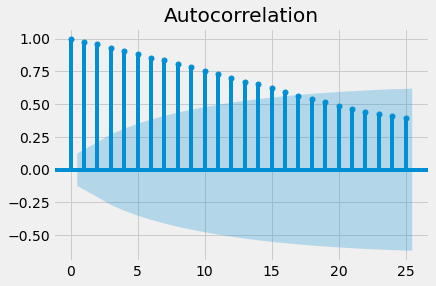

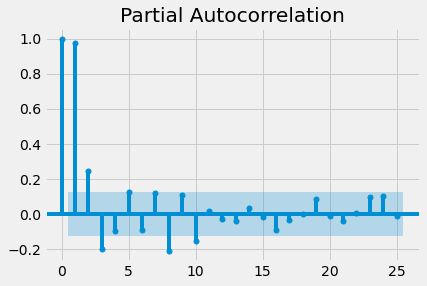

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dji_df['Close'].plot()
plot_acf(dji_df['Close'])
plot_pacf(dji_df['Close'])
plt.show()

The dataset clearly shows a non-stationary signal with an increasing trend. The ACF is also showing an exponential decay while PACF gas strong correlation in lag 2. The non-stationarity can also be checked by evaluating mean and variance in different time periods, The difference in mean and variance validetae de hypothesis of non-stationarity. For example, we split DJIA dataset in two semesters from Jan-July and Aug-Jan and evaluate the eman and variance as follows 

In [12]:
mean1, mean2 = dji_df['2020-02-01':'2020-07-01'].Close.mean(), dji_df['2020-07-01':'2021-07-01'].Close.mean()
var1, var2 = dji_df['2020-02-01':'2020-07-01'].Close.var(), dji_df['2020-07-01':'2021-03-01'].Close.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=24891.384728, mean2=28426.047419
variance1=6349101.176069, variance2=2171242.885646


Using ADF test to evaluate stationarity. The null Hypotesis is the presence of the unit root or non-stationarity whreas the alternate hypotesis suggests stationarity of the data

In [14]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(dji_df.Close.to_list())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])


ADF Statistic: -1.445578
p-value: 0.560241


Ideally, a more negative value of ADF statistics will represent a stationary signal. For the
given dataset, as p-value is quite high, we cannot reject the NULL hypothesis making it a
non-stationary signal.

#### Making Time Series Stationary with first order Differentiation

Text(0.5, 1.0, 'First Diff of DJIA during Jan 2016 and Jan 2021')

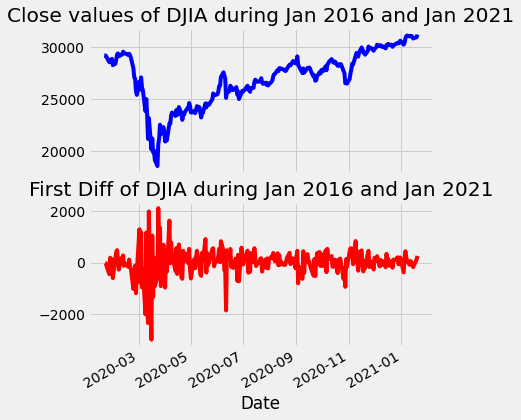

In [20]:
first_order_diff = dji_df['Close'].diff(1)
fig, ax = plt.subplots(2,sharex=True)
fig.set_size_inches(5.5,6.5)
dji_df['Close'].plot(ax=ax[0],color='b')
ax[0].set_title('Close values of DJIA during Jan 2016 and Jan 2021')
first_order_diff.plot(ax=ax[1],color='r')
ax[1].set_title('First Diff of DJIA during Jan 2016 and Jan 2021')

#### Plotting ACF and PACF of First Order Diff

ADF Statistic: -4.388889
p-value: 0.000311


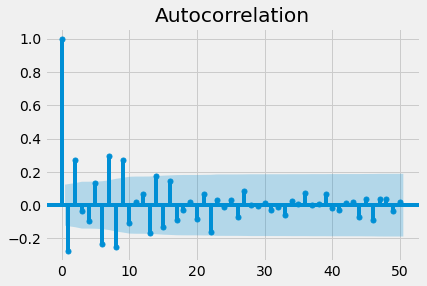

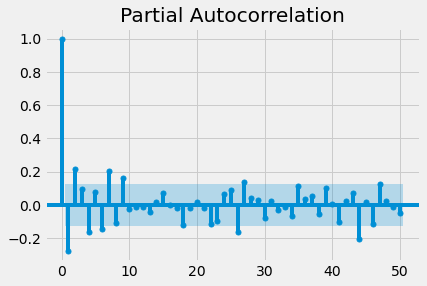

In [41]:
first_order_diff = first_order_diff.dropna()
plot_acf(first_order_diff, lags=50)
plot_pacf(first_order_diff, lags= 50)
adf_result = adfuller(first_order_diff.to_list())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
plt.show()

##### Looking for PACF plot the autocorrelation becomes slightly significant at 44 index, which means that there may be seasonality present


-> The ADF statistics on residual have a value of -4.39 with p-val close to zero, thus stating
that the model is stationary; however, both ACF and PACF show not much of trend of the
moving average component showing a random walk behavior. Also, another way to run is
to optimize using AIC as a criteria:


#### OBS: Akaike Information Criterion  = (AIC)

In [33]:
# Optimize Arma Parameters
from statsmodels.tsa.arima.model import ARIMA
import itertools
aicVal = []
p = q = range(0,3)
d = range(1,3)
pd_opt = list(itertools.product(p,d,q))
for param in pd_opt:
    try:
        arima_obj = ARIMA(dji_df['Close'].to_list(),order=param)
        arima_obj_fit=arima_obj.fit()
        aicVal.append([param[0], param[1], param[2], arima_obj_fit.aic])
    except:
        pass



C:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

In [34]:
aicVal

[[0, 1, 0, 3897.8487844724273],
 [0, 1, 1, 3890.4240764032184],
 [0, 1, 2, 3879.6174568443976],
 [0, 2, 0, 4117.907588512609],
 [0, 2, 1, 3989.304968028835],
 [0, 2, 2, 3991.843172360631],
 [1, 1, 0, 3887.4429278702582],
 [1, 1, 1, 3885.761048285298],
 [1, 1, 2, 3880.905832622448],
 [1, 2, 0, 4011.1863657485437],
 [1, 2, 1, 3991.2955907389787],
 [1, 2, 2, 3984.1642455531733],
 [2, 1, 0, 3881.397918304661],
 [2, 1, 1, 3883.1497076978776],
 [2, 1, 2, 3881.538587839299],
 [2, 2, 0, 4001.0123144957456],
 [2, 2, 1, 3979.614849262046],
 [2, 2, 2, 3981.536563489482]]

AIC between models are very close. Chosing ARIMA(2,1,0) to evaluate the model:

In [39]:
arima_model = ARIMA(dji_df['Close'].to_list(),order=(2,1,0))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

dji_df['ARIMA'] = arima_model_fit.fittedvalues.tolist()
dji_df['DiffEval'] = arima_model_fit.resid + arima_model_fit.fittedvalues
dji_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,ARIMA,DiffEval
Date,,,,,,,,,
2020-01-21,2020-01-21,29269.050781,29341.210938,29146.470703,29196.039063,29196.039063,320640000,0.000000,29196.039063
2020-01-22,2020-01-22,29263.630859,29320.199219,29172.259766,29186.269531,29186.269531,283440000,28173.364583,29186.269531
2020-01-23,2020-01-23,29111.019531,29190.470703,28966.980469,29160.089844,29160.089844,307060000,30080.816436,29160.089844
2020-01-24,2020-01-24,29230.390625,29288.789063,28843.310547,28989.730469,28989.730469,380010000,29162.279217,28989.730469
2020-01-27,2020-01-27,28542.490234,28671.789063,28440.470703,28535.800781,28535.800781,337270000,29009.275534,28535.800781
2020-01-28,2020-01-28,28594.279297,28823.230469,28575.750000,28722.849609,28722.849609,330140000,28573.625532,28722.849609
2020-01-29,2020-01-29,28820.529297,28944.240234,28728.189453,28734.449219,28734.449219,302290000,28633.001986,28734.449219
2020-01-30,2020-01-30,28640.160156,28879.710938,28489.759766,28859.439453,28859.439453,326850000,28759.367914,28859.439453
2020-01-31,2020-01-31,28813.039063,28813.039063,28169.529297,28256.029297,28256.029297,403890000,28844.021570,28256.029297


Text(0, 0.5, 'Closing Prices')

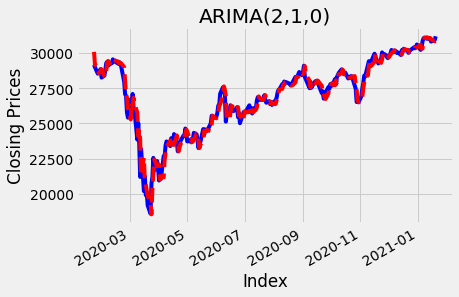

In [40]:
# Plot Curves
f, axarr = plt.subplots(1, sharex=True)
fig.set_size_inches(5.5,6.5)
dji_df['DiffEval'].iloc[2:].plot(color='b',linestyle='-',ax=axarr)
dji_df['ARIMA'].iloc[2:].plot(color='r',linestyle='--',ax=axarr)
axarr.set_title('ARIMA(2,1,0)')
plt.xlabel('Index')
plt.ylabel('Closing Prices')

### Seasonality analysis Considering First Diff PACF Plot with 44 lags of period  

<AxesSubplot:xlabel='Date'>

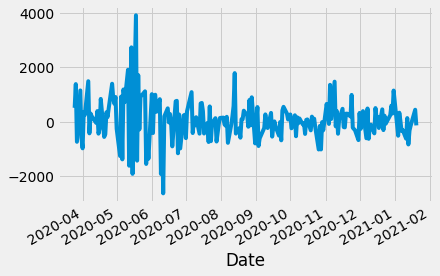

In [42]:
x  = first_order_diff - first_order_diff.shift(44)
x.plot()

The preceding seasonality can be corrected using seasonal ARIMA supported in the
statmodels.SARIMAX model. The script to set up a seasonal ARIMA model for the DJIA
dataset is as follows:

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(dji_df['Close'].to_list(),trend='n',order=(2,1,0),seasonal_order = (1,1,1,44))
sarimax_model_fit = sarimax_model.fit()
sarimax_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  253
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 44)   Log Likelihood               -1654.645
Date:                              Wed, 17 Mar 2021   AIC                           3319.290
Time:                                      22:15:30   BIC                           3335.977
Sample:                                           0   HQIC                          3326.037
                                              - 253                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1665      0.041     -4.082      0.000      -0.246      -0.087
ar.L2          0.0891      0.025      3.495      0.000       0.039       0.139
ar.S.L44       0.1694      0.124      1.362      0.173      -0.074       0.413
ma.S.L44      -0.4781      0.144     -3.320      0.001      -0.760      -0.196
sigma2      4.338e+05   2.67e+04     16.249      0.000    3.81e+05    4.86e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):               170.35
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model shows improvement in terms of AIC and can be further optimized for
different components involved in the SARIMAX model.

### SARIMAX Forecasting with confidence Intervals

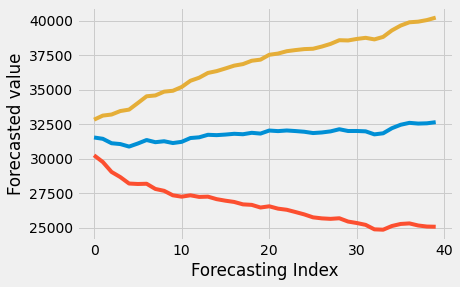

In [50]:
res= sarimax_model_fit.get_forecast(40)
plt.plot(res.predicted_mean)
plt.plot(res.conf_int())
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')
plt.show()